#### Import of Libraries

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

Data Tinkering Functions

In [154]:
#df=df.drop(columns=["at1"])
#df=df.head(900)
#df = df[df != "?"]
#df=df.dropna(axis=0, how="any")
#df=df.astype(float)
#df.to_csv('datasets/blocks/page-blocks-e.csv', index=False)
def valueChange(columnLabel):
    for j in columnLabel:
        y = df[j]
        clas = y.unique()
        for i in range(len(clas)):
            df[j]=df[j].replace(clas[i],i)
        

#### Dataset

In [155]:
df = pd.read_csv('datasets/heart2/heart.csv')
#valueChange(["LargestSpotSize","SpotDistribution"])


In [156]:
df.head(5)

,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced,Oldpeak,Slope,MajorVessels,Thal,Class
0,70,1,4,130,322,0,2,109,0,24.0,2,3,3,2
1,67,0,3,115,564,0,2,160,0,16.0,2,0,7,1
2,57,1,2,124,261,0,0,141,0,3.0,1,0,7,2
3,64,1,4,128,263,0,0,105,1,2.0,2,1,7,1
4,74,0,2,120,269,0,2,121,1,2.0,1,1,3,1


In [157]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   ChestPainType            270 non-null    int64  
 3   RestBloodPressure        270 non-null    int64  
 4   SerumCholestoral         270 non-null    int64  
 5   FastingBloodSugar        270 non-null    int64  
 6   ResElectrocardiographic  270 non-null    int64  
 7   MaxHeartRate             270 non-null    int64  
 8   ExerciseInduced          270 non-null    int64  
 9   Oldpeak                  270 non-null    float64
 10  Slope                    270 non-null    int64  
 11  MajorVessels             270 non-null    int64  
 12  Thal                     270 non-null    int64  
 13  Class                    270 non-null    int64  
dtypes: float64(1), int64(13)
m

#### Exploratory Data Analysis

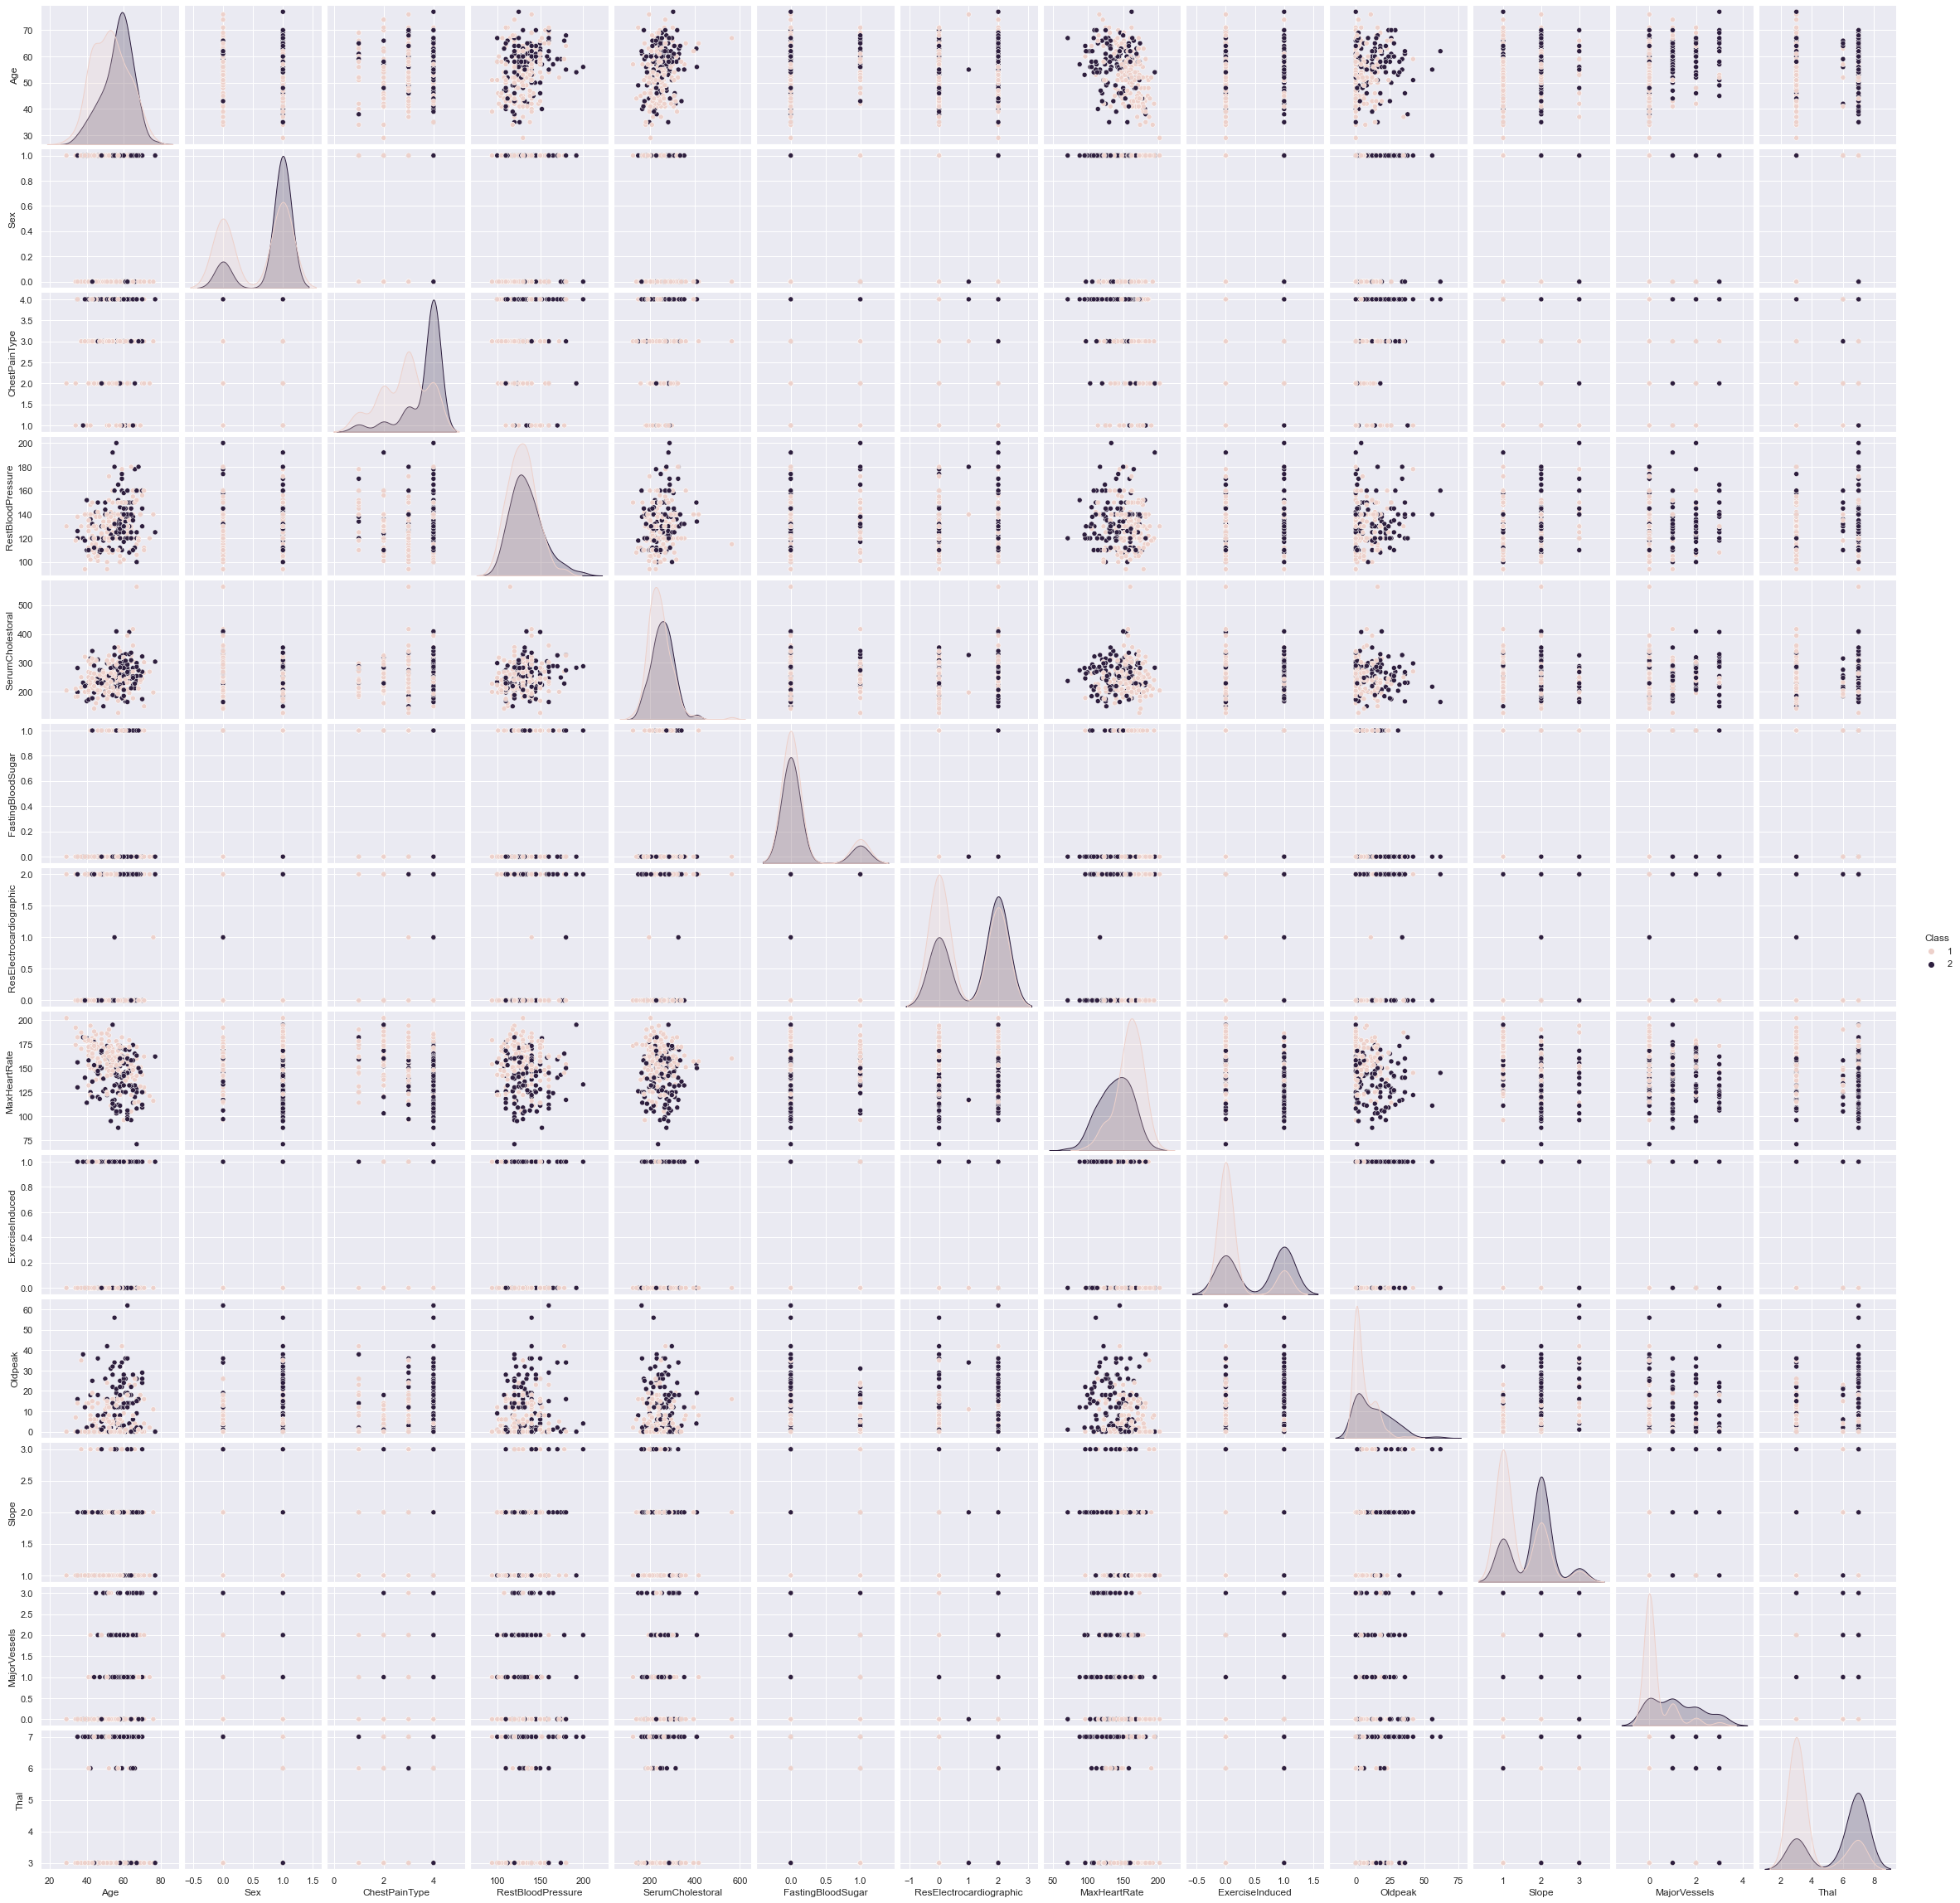

In [158]:
sns.pairplot(df, hue='Class')
plt.show()

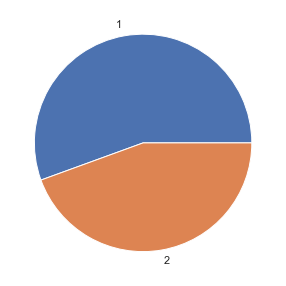

In [159]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [160]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
ChestPainType,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
RestBloodPressure,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
SerumCholestoral,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FastingBloodSugar,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
ResElectrocardiographic,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
MaxHeartRate,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
ExerciseInduced,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
Oldpeak,270.0,8.900000,11.003936,0.0,0.0,4.0,15.0,62.0


#### Standardize the Data

In [161]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,270.0,3.667848e-16,1.001857,-2.797275,-0.707568,0.062325,0.722232,2.481986
Sex,270.0,6.579099e-18,1.001857,-1.450327,-1.450327,0.689500,0.689500,0.689500
ChestPainType,270.0,6.085667e-17,1.001857,-2.292532,-0.183559,-0.183559,0.870928,0.870928
RestBloodPressure,270.0,5.682697e-16,1.001857,-2.094649,-0.636310,-0.075410,0.485490,3.850888
SerumCholestoral,270.0,-2.467162e-16,1.001857,-2.396942,-0.710583,-0.090312,0.588108,6.093004
FastingBloodSugar,270.0,4.194176e-17,1.001857,-0.417029,-0.417029,-0.417029,-0.417029,2.397916
ResElectrocardiographic,270.0,3.125072e-17,1.001857,-1.026285,-1.026285,0.981664,0.981664,0.981664
MaxHeartRate,270.0,2.631640e-17,1.001857,-3.402609,-0.721271,0.165301,0.705894,2.262800
ExerciseInduced,270.0,7.894919e-17,1.001857,-0.701222,-0.701222,-0.701222,1.426081,1.426081
Oldpeak,270.0,-2.631640e-17,1.001857,-0.810303,-0.810303,-0.446122,0.555377,4.834507


#### Observations and Variables

In [162]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

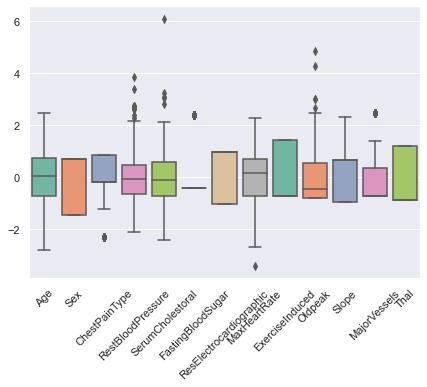

In [163]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

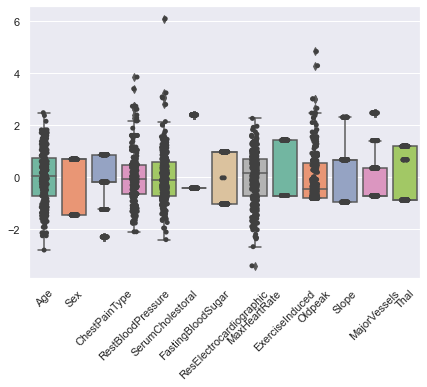

In [164]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

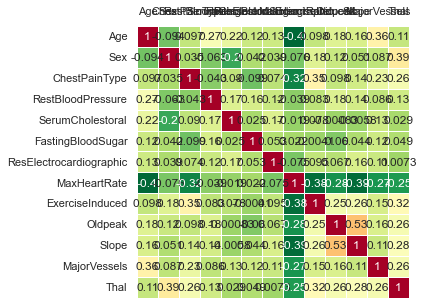

In [165]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [166]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [167]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,2.718274,1.572275,-0.933166,-0.045373,0.674441,-1.470375,-1.783319,0.598933,-0.199141,0.288818,-1.113718,1.351279
1,0.989146,3.452372,-1.620317,0.640418,-2.373774,1.454994,-1.163029,2.986773,-3.057041,-1.604195,-0.360186,-0.790442
2,-0.810766,-0.607932,0.374778,-0.610329,0.685143,0.853112,-0.915122,-0.385658,-1.499987,-0.849666,0.380870,-0.341732
3,2.303640,-0.825888,-1.142479,-0.605483,0.993855,0.666903,0.389322,-0.723736,-1.071982,-0.532608,0.548405,0.280127
4,0.374036,1.919601,-1.405317,0.152710,0.672699,-1.147597,0.054763,-1.401891,-1.576172,1.195283,0.863896,-1.210730
...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.508035,0.111290,2.675573,-1.645643,0.520068,1.576990,1.168893,-0.813933,0.966287,-0.844466,-0.397031,0.004660
266,-1.918406,-1.216181,0.547229,-0.806678,-0.263777,1.158892,-0.791236,0.474567,-0.892714,-0.494209,0.675026,-0.265113
267,-0.651887,1.771823,0.326715,1.850508,-0.676359,-0.366121,-0.248295,0.154859,-0.381042,-0.135398,0.447063,-0.042150
268,0.116849,-1.137567,0.301323,0.129987,0.777272,0.629771,-0.034146,-0.693272,0.658080,-1.471403,-0.272977,0.174961


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'12 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (22.5% expl.var)', ylabel='PC2 (12.4% expl.var)'>)

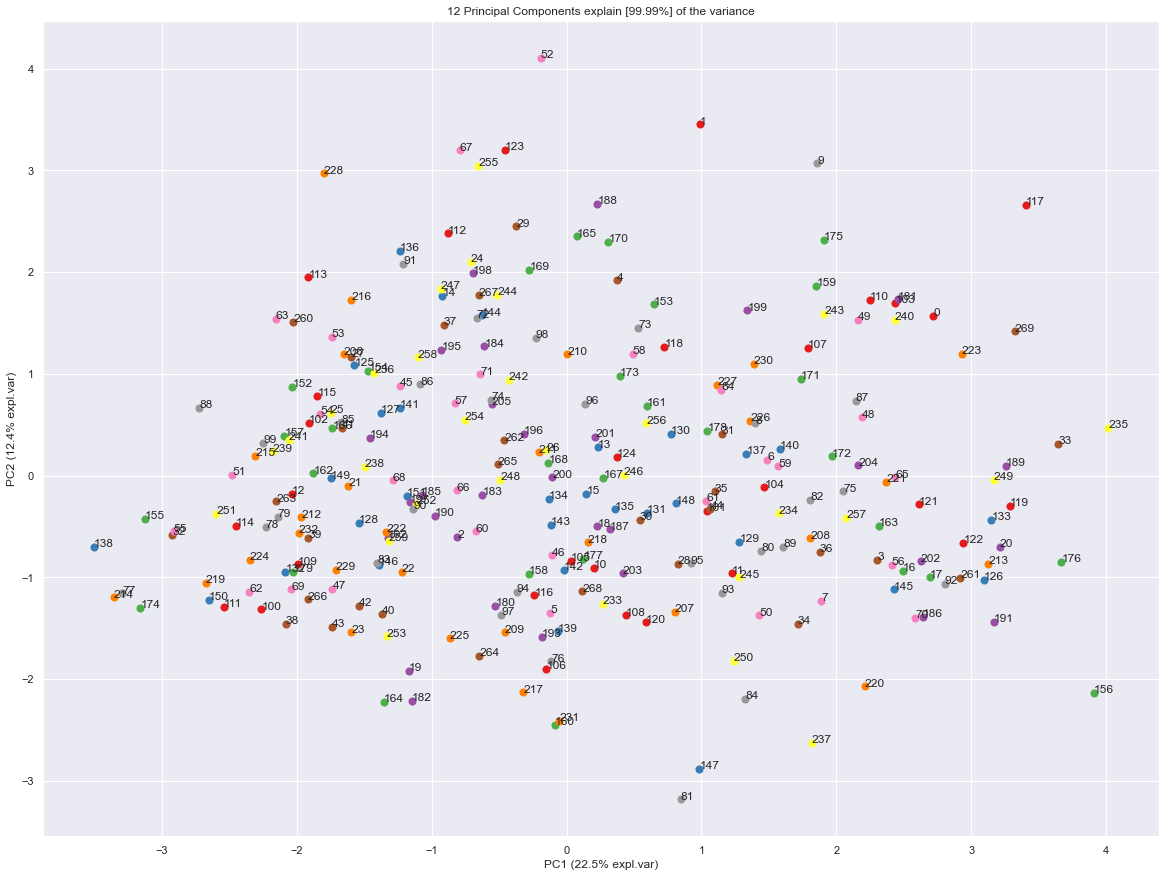

In [168]:
model.scatter(label=True, legend=False)

Eigenvectors

In [169]:
A = out['loadings'].T

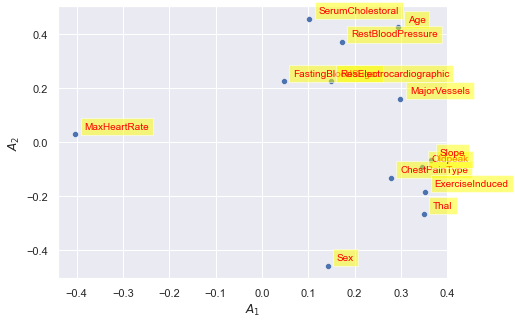

In [170]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

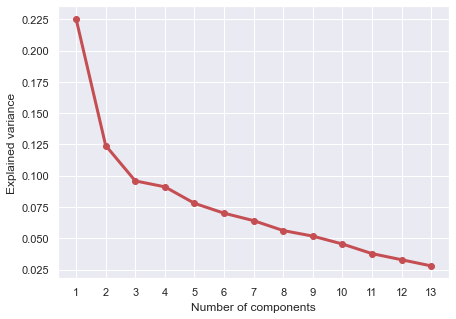

In [171]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

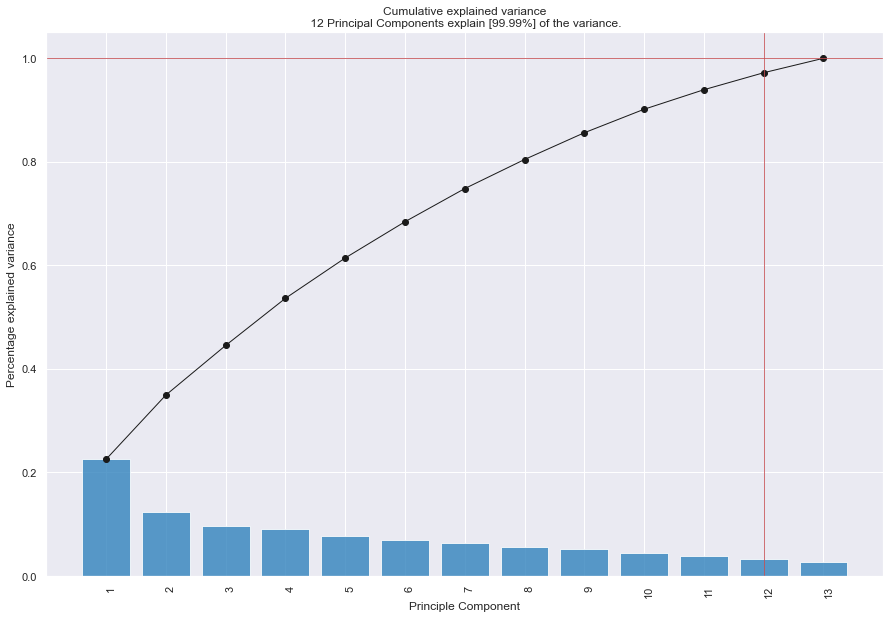

<Figure size 504x360 with 0 Axes>

In [172]:
model.plot();